In [12]:
import imports as ii
import functions as f
import preprocessing as pp
import neuralnetworks as nn
import trainRNN as trainRNN

In [24]:
ii.reload(f)
ii.reload(pp)
ii.reload(nn)
ii.reload(trainRNN)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MUSIC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MUSIC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MUSIC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MUSIC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<module 'trainRNN' from 'D:\\ITU-BOOK\\2ndYearProject-NLP\\trainRNN.py'>

In [14]:
PATH = {}
PATH["dataset_classification"] = "dataset/classification/"
PATH["dataset_labeling"] = "dataset/seq_labeling/"
PATH["music_reviews_train"] = PATH["dataset_classification"] + "music_reviews_train.json.gz"
PATH["music_reviews_dev"] = PATH["dataset_classification"] + "music_reviews_dev.json.gz"
PATH["music_reviews_test"] = PATH["dataset_classification"] + "music_reviews_test_masked.json.gz"
train = f.readJson(PATH["music_reviews_train"])
test = f.readJson(PATH["music_reviews_dev"])

Number of data:  100000
Number of data:  10000


In [74]:
X_train, y_train, train_idx, train_missing_idx = f.json_divide(train)
X_test, y_test, test_idx, test_missing_idx = f.json_divide(test)

# convert labels
sent_dict = {"positive": 1, "negative": 0}
y_train = pp.sentiment_converter(y_train, sent_dict)
y_test = pp.sentiment_converter(y_test, sent_dict)

##############################################################
leng = 10000 # train set size (how many samples are used for training)
start = 6666
maxlen = 70 # length of sentences

##############################################################
X_train = X_train[start:start+leng]
y_train = y_train[start:start+leng]
#X_test = X_test[start:start+leng]
#y_test = y_test[start:start+leng]

# Grid search & Training

# Below line is running for a while

In [75]:
data_sets, y_train, y_test = f.grid_search(X_train, X_test, y_train, y_test)

In [78]:
data_sets[0][0]

[0, 1, 0, 0, 0, 0]

In [86]:
data_sets[0][1][0]

['A', 'classic', 'died', 'to', 'young']

In [1]:
data_sets[0][2][0]

NameError: name 'data_sets' is not defined

In [80]:
data_sets[0][2]

[['My',
  'dentist',
  'recommended',
  'this',
  'as',
  'a',
  'relaxation',
  'technique',
  'for',
  'dental',
  'visits',
  '.',
  'They',
  'give',
  'me',
  'an',
  'ipod',
  'with',
  'headphones',
  'play',
  'this',
  'on',
  'it',
  'and',
  'it',
  'relieves',
  'some',
  'of',
  'stress',
  'of',
  'dental',
  'treatment',
  'which',
  'I',
  'dislike',
  'intensely',
  '.',
  'It',
  'worked',
  'so',
  'well',
  'that',
  'I',
  'bought',
  'my',
  'own',
  'copy',
  'to',
  'try',
  'at',
  'home',
  '.',
  'I',
  'fall',
  'asleep',
  'after',
  'a',
  'couple',
  'of',
  'minutes',
  'and',
  'stay',
  'asleep',
  '.',
  'Instead',
  'of',
  'tossing',
  'and',
  'turning',
  'I',
  'hardly',
  'move',
  'at',
  'all',
  '.',
  'Highly',
  'recommend',
  '.'],
 ['I',
  'am',
  'personally',
  'acquainted',
  'with',
  'a',
  'member',
  'of',
  'this',
  'group',
  'and',
  'I',
  'love',
  'his',
  'music',
  'but',
  'unfortunately',
  'despite',
  'his',
  'efforts

In [59]:
ii.reload(f)

<module 'functions' from 'D:\\ITU-BOOK\\2ndYearProject-NLP\\functions.py'>

In [76]:
# ii.reload(f)
# to be merged into the training, now seperated
# basic statistics about the sets
f.statistics_sets_sizes(data_sets, filename="10k_70len_final", max_len=maxlen)

Combinations:  [0, 1, 0, 0, 0, 0]
Combinations:  [0, 1, 0, 0, 0, 1]
Combinations:  [0, 1, 0, 0, 1, 0]
Combinations:  [0, 1, 0, 0, 1, 1]
Combinations:  [0, 1, 0, 1, 0, 0]
Combinations:  [0, 1, 0, 1, 0, 1]
Combinations:  [0, 1, 0, 1, 1, 0]
Combinations:  [0, 1, 0, 1, 1, 1]
Combinations:  [0, 1, 1, 0, 0, 0]
Combinations:  [0, 1, 1, 0, 0, 1]
Combinations:  [0, 1, 1, 0, 1, 0]
Combinations:  [0, 1, 1, 0, 1, 1]
Combinations:  [0, 1, 1, 1, 0, 0]
Combinations:  [0, 1, 1, 1, 0, 1]
Combinations:  [0, 1, 1, 1, 1, 0]
Combinations:  [0, 1, 1, 1, 1, 1]
Combinations:  [1, 1, 0, 0, 0, 0]
Combinations:  [1, 1, 0, 0, 0, 1]
Combinations:  [1, 1, 0, 0, 1, 0]
Combinations:  [1, 1, 0, 0, 1, 1]
Combinations:  [1, 1, 0, 1, 0, 0]
Combinations:  [1, 1, 0, 1, 0, 1]
Combinations:  [1, 1, 0, 1, 1, 0]
Combinations:  [1, 1, 0, 1, 1, 1]
Combinations:  [1, 1, 1, 0, 0, 0]
Combinations:  [1, 1, 1, 0, 0, 1]
Combinations:  [1, 1, 1, 0, 1, 0]
Combinations:  [1, 1, 1, 0, 1, 1]
Combinations:  [1, 1, 1, 1, 0, 0]
Combinations: 

Combinations:  [0, 1, 0, 0, 0, 0]
Epoch 1/10
1200/1200 [==============================] - 164s 135ms/step - loss: 0.5125 - accuracy: 0.7603 - val_loss: 0.3284 - val_accuracy: 0.8761 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2438 - accuracy: 0.9144
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 161s 135ms/step - loss: 0.2438 - accuracy: 0.9144 - val_loss: 0.3190 - val_accuracy: 0.8804 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1528 - accuracy: 0.9540
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 157s 131ms/step - loss: 0.1528 - accuracy: 0.9540 - val_loss: 0.3232 - val_accuracy: 0.8906 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1274 - accuracy: 0.9619
Epoch 4: ReduceLROnPlateau reducing learning rate to 

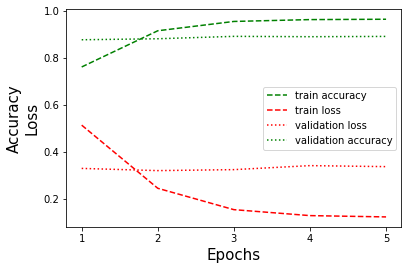

Combinations:  [0, 1, 0, 0, 0, 1]
Epoch 1/10
1200/1200 [==============================] - 136s 112ms/step - loss: 8.9197 - accuracy: 0.4217 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 8.9198 - accuracy: 0.4217
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 139s 116ms/step - loss: 8.9198 - accuracy: 0.4217 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 8.9198 - accuracy: 0.4217
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 143s 119ms/step - loss: 8.9198 - accuracy: 0.4217 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 2.0000e-04
Epoch 3: early stopping


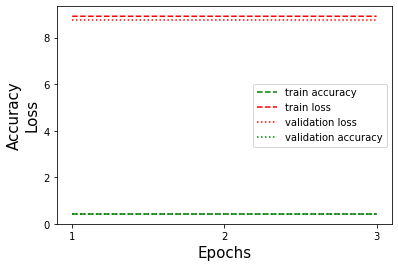

Combinations:  [0, 1, 0, 1, 0, 0]
Epoch 1/10
1200/1200 [==============================] - 155s 128ms/step - loss: 5.4594 - accuracy: 0.5094 - val_loss: 8.7649 - val_accuracy: 0.4318 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 8.9198 - accuracy: 0.4217
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 154s 128ms/step - loss: 8.9198 - accuracy: 0.4217 - val_loss: 8.7649 - val_accuracy: 0.4318 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 8.9198 - accuracy: 0.4217
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 151s 126ms/step - loss: 8.9198 - accuracy: 0.4217 - val_loss: 8.7649 - val_accuracy: 0.4318 - lr: 2.0000e-04
Epoch 3: early stopping


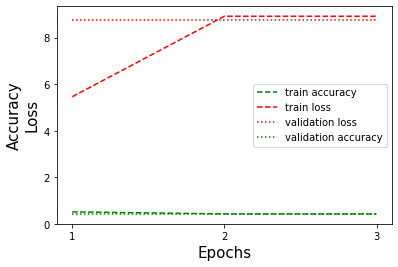

Combinations:  [0, 1, 0, 1, 0, 1]
Epoch 1/10
1200/1200 [==============================] - 161s 132ms/step - loss: 0.4881 - accuracy: 0.7763 - val_loss: 0.4981 - val_accuracy: 0.8508 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2920 - accuracy: 0.9018
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 160s 133ms/step - loss: 0.2920 - accuracy: 0.9018 - val_loss: 0.3369 - val_accuracy: 0.8670 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1767 - accuracy: 0.9437
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 156s 130ms/step - loss: 0.1767 - accuracy: 0.9437 - val_loss: 0.3629 - val_accuracy: 0.8789 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1457 - accuracy: 0.9553
Epoch 4: ReduceLROnPlateau reducing learning rate to 

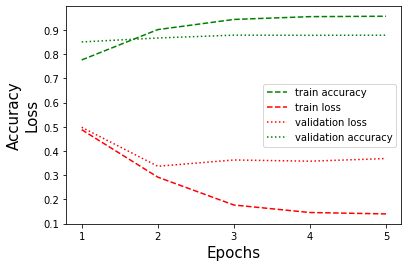

Combinations:  [0, 1, 1, 0, 0, 0]
Epoch 1/10
1200/1200 [==============================] - 169s 122ms/step - loss: 2.3437 - accuracy: 0.6723 - val_loss: 2.1781 - val_accuracy: 0.6996 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 147s 123ms/step - loss: 2.4780 - accuracy: 0.7043 - val_loss: 0.7386 - val_accuracy: 0.6065 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 0.5394 - accuracy: 0.7589
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 149s 124ms/step - loss: 0.5394 - accuracy: 0.7589 - val_loss: 0.4353 - val_accuracy: 0.8275 - lr: 0.0010
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.3499 - accuracy: 0.8751
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 149s 124ms/step - loss: 0.3499 - accuracy: 0.8751 - val_loss: 0.3874 - val_accuracy: 0.8505 - lr: 2

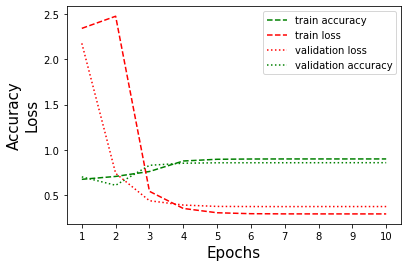

Combinations:  [0, 1, 1, 0, 0, 1]
Epoch 1/10
1200/1200 [==============================] - 149s 123ms/step - loss: 1.5790 - accuracy: 0.6379 - val_loss: 4.0778 - val_accuracy: 0.6689 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 146s 121ms/step - loss: 0.9880 - accuracy: 0.6147 - val_loss: 0.7121 - val_accuracy: 0.6511 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - 145s 121ms/step - loss: 0.6070 - accuracy: 0.6702 - val_loss: 0.7277 - val_accuracy: 0.4738 - lr: 0.0010
Epoch 3: early stopping


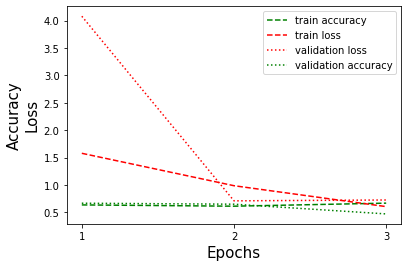

Combinations:  [0, 1, 1, 1, 0, 0]
Epoch 1/10
1200/1200 [==============================] - 158s 130ms/step - loss: 0.5365 - accuracy: 0.7506 - val_loss: 0.3846 - val_accuracy: 0.8442 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2812 - accuracy: 0.8989
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 151s 126ms/step - loss: 0.2812 - accuracy: 0.8989 - val_loss: 0.2974 - val_accuracy: 0.8834 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1817 - accuracy: 0.9405
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 151s 126ms/step - loss: 0.1817 - accuracy: 0.9405 - val_loss: 0.2987 - val_accuracy: 0.8851 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1527 - accuracy: 0.9504
Epoch 4: ReduceLROnPlateau reducing learning rate to 

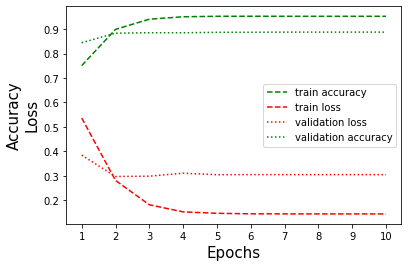

Combinations:  [0, 1, 1, 1, 0, 1]
Epoch 1/10
1200/1200 [==============================] - 162s 133ms/step - loss: 8.9198 - accuracy: 0.4217 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 8.9198 - accuracy: 0.4217
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 162s 135ms/step - loss: 8.9198 - accuracy: 0.4217 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 8.9198 - accuracy: 0.4217
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 166s 138ms/step - loss: 8.9198 - accuracy: 0.4217 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 2.0000e-04
Epoch 3: early stopping


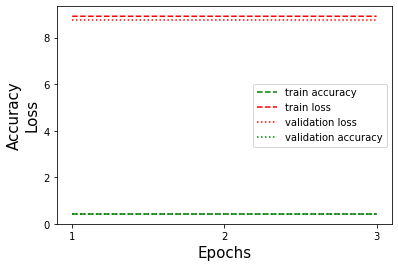

Combinations:  [1, 1, 0, 0, 0, 0]
Epoch 1/10
1200/1200 [==============================] - 193s 156ms/step - loss: 0.4538 - accuracy: 0.7902 - val_loss: 0.6740 - val_accuracy: 0.6082 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 1.4374 - accuracy: 0.7991
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 177s 148ms/step - loss: 1.4374 - accuracy: 0.7991 - val_loss: 1.4534 - val_accuracy: 0.7839 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 1.3352 - accuracy: 0.8104
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 188s 157ms/step - loss: 1.3352 - accuracy: 0.8104 - val_loss: 1.1904 - val_accuracy: 0.8141 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 1.0900 - accuracy: 0.8517
Epoch 4: ReduceLROnPlateau reducing learning rate to 

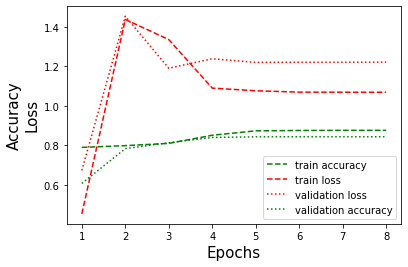

Combinations:  [1, 1, 0, 0, 0, 1]
Epoch 1/10
1200/1200 [==============================] - 198s 163ms/step - loss: 0.5777 - accuracy: 0.7165 - val_loss: 0.4021 - val_accuracy: 0.8381 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 189s 157ms/step - loss: 0.6224 - accuracy: 0.7532 - val_loss: 0.7577 - val_accuracy: 0.6995 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - 190s 158ms/step - loss: 0.7171 - accuracy: 0.7239 - val_loss: 0.7419 - val_accuracy: 0.6503 - lr: 0.0010
Epoch 3: early stopping


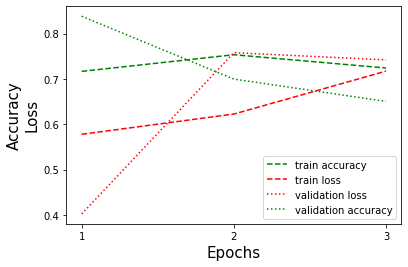

Combinations:  [1, 1, 0, 1, 0, 0]
Epoch 1/10
1200/1200 [==============================] - 187s 154ms/step - loss: 8.9198 - accuracy: 0.4217 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 8.9198 - accuracy: 0.4217
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 196s 164ms/step - loss: 8.9198 - accuracy: 0.4217 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 8.9198 - accuracy: 0.4217
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 188s 157ms/step - loss: 8.9198 - accuracy: 0.4217 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 2.0000e-04
Epoch 3: early stopping


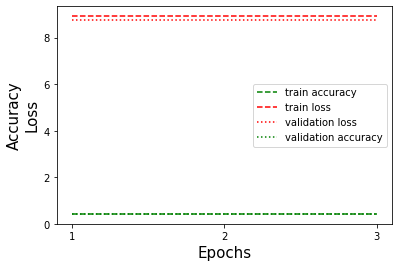

Combinations:  [1, 1, 0, 1, 0, 1]
Epoch 1/10
1200/1200 [==============================] - 195s 161ms/step - loss: 2.7807 - accuracy: 0.6362 - val_loss: 3.7370 - val_accuracy: 0.6707 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 191s 160ms/step - loss: 3.4873 - accuracy: 0.6684 - val_loss: 2.3546 - val_accuracy: 0.6596 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 1.3428 - accuracy: 0.7545
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 194s 162ms/step - loss: 1.3428 - accuracy: 0.7545 - val_loss: 0.4237 - val_accuracy: 0.8116 - lr: 0.0010
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2740 - accuracy: 0.9018
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 174s 145ms/step - loss: 0.2740 - accuracy: 0.9018 - val_loss: 0.3536 - val_accuracy: 0.8658 - lr: 2

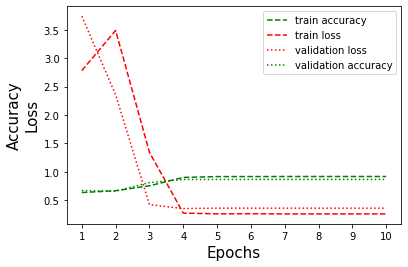

Combinations:  [1, 1, 1, 0, 0, 0]
Epoch 1/10
1200/1200 [==============================] - 172s 142ms/step - loss: 0.4501 - accuracy: 0.8033 - val_loss: 0.3648 - val_accuracy: 0.8593 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 171s 142ms/step - loss: 0.4334 - accuracy: 0.8120 - val_loss: 0.6507 - val_accuracy: 0.6178 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 2.3468 - accuracy: 0.8082
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 168s 140ms/step - loss: 2.3468 - accuracy: 0.8082 - val_loss: 2.6151 - val_accuracy: 0.7925 - lr: 0.0010
Epoch 3: early stopping


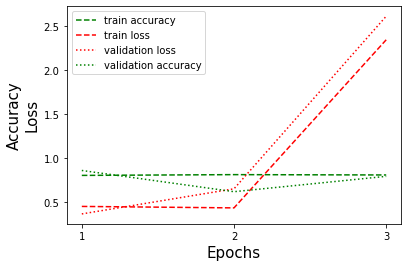

Combinations:  [1, 1, 1, 0, 0, 1]
Epoch 1/10
1200/1200 [==============================] - 179s 147ms/step - loss: 2.4185 - accuracy: 0.6765 - val_loss: 1.1196 - val_accuracy: 0.6645 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 177s 148ms/step - loss: 1.1224 - accuracy: 0.6870 - val_loss: 1.0923 - val_accuracy: 0.6627 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - 170s 142ms/step - loss: 1.0771 - accuracy: 0.7027 - val_loss: 0.7937 - val_accuracy: 0.5720 - lr: 0.0010
Epoch 3: early stopping


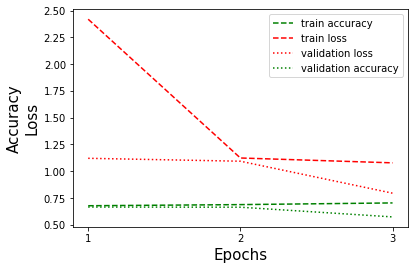

Combinations:  [1, 1, 1, 1, 0, 0]
Epoch 1/10
1200/1200 [==============================] - 576s 169ms/step - loss: 2.2834 - accuracy: 0.6130 - val_loss: 0.6524 - val_accuracy: 0.6215 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 205s 171ms/step - loss: 0.5607 - accuracy: 0.7211 - val_loss: 0.6562 - val_accuracy: 0.6104 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - 205s 171ms/step - loss: 0.5962 - accuracy: 0.7121 - val_loss: 0.6766 - val_accuracy: 0.5997 - lr: 0.0010
Epoch 3: early stopping


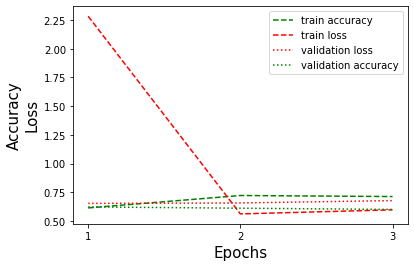

Combinations:  [1, 1, 1, 1, 0, 1]
Epoch 1/10
1200/1200 [==============================] - 212s 175ms/step - loss: 0.6798 - accuracy: 0.6122 - val_loss: 0.6332 - val_accuracy: 0.7163 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 1.6419 - accuracy: 0.8061
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 207s 172ms/step - loss: 1.6419 - accuracy: 0.8061 - val_loss: 2.2851 - val_accuracy: 0.7767 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 2.5379 - accuracy: 0.8017
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 195s 163ms/step - loss: 2.5379 - accuracy: 0.8017 - val_loss: 3.3178 - val_accuracy: 0.7560 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 2.7992 - accuracy: 0.7977
Epoch 4: ReduceLROnPlateau reducing learning rate to 

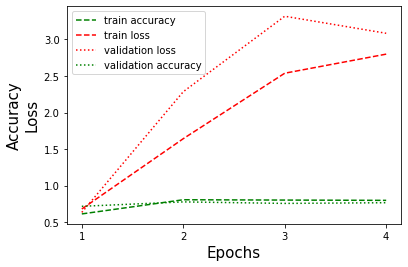

Combinations were checked


In [54]:
trainRNN.trainRNN(data_sets, y_train, y_test, early_stop_patience=2, filename="30K_train_maxlen_70", maxlen=maxlen)

Combinations:  [0, 1, 0, 0, 0, 1]
Epoch 1/10
400/400 [==============================] - 49s 119ms/step - loss: 0.5958 - accuracy: 0.7092 - val_loss: 0.7398 - val_accuracy: 0.7290 - lr: 0.0010
Epoch 2/10
400/400 [==============================] - ETA: 0s - loss: 0.2977 - accuracy: 0.8945
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
400/400 [==============================] - 40s 101ms/step - loss: 0.2977 - accuracy: 0.8945 - val_loss: 0.4593 - val_accuracy: 0.8200 - lr: 0.0010
Epoch 3/10
400/400 [==============================] - ETA: 0s - loss: 0.1529 - accuracy: 0.9515
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
400/400 [==============================] - 40s 101ms/step - loss: 0.1529 - accuracy: 0.9515 - val_loss: 0.3973 - val_accuracy: 0.8478 - lr: 2.0000e-04
Epoch 4/10
400/400 [==============================] - ETA: 0s - loss: 0.1181 - accuracy: 0.9647
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.0000005254987

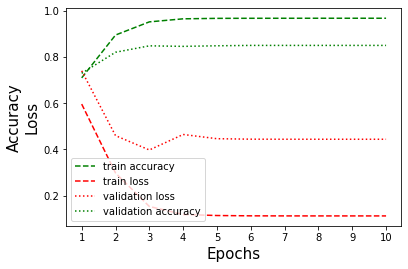

Combinations were checked


In [73]:
# WITH LEMMATIZER 
re = [[0, 1, 0, 0, 0, 1]

]

for i in re:
    data_sets, y_train, y_test = f.grid_search_retrain(X_train, X_test, y_train, y_test, i)
    trainRNN.trainRNN(data_sets, y_train, y_test, early_stop_patience=10, filename="lemma/LEMMA_10_-maxlen_70-retrain_old_stop_words", maxlen=maxlen)